# Statistics

We are going to explore a few things in terms of statistics for this lesson, and specifically work a bit with bollinger bands as an example of using some statistics. First, the code below just creates data but can be ignored. It will be a random stock price that we can think about analyzing.

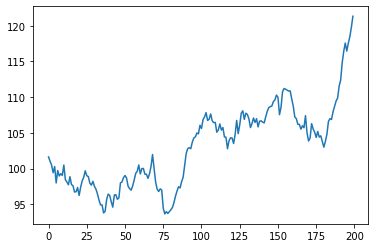

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
base = np.array([100] * 200)
random_error = np.random.normal(0, .01, 200) * 100
random_error = np.cumsum(random_error)

trend = np.array([0] * 60+[-.5]*20+[.5]*20+[0]*60+[-.5]*20+[.5]*20)
trend = np.cumsum(trend)

df = pd.Series(base + random_error+trend)
plt.plot(df)
plt.show()

## Simple Statistics

There are quite a few simple statistics we can begin with. The maximum, the minimum, and using describe to get a high level overview of the data.

In [2]:
#Let's find the max
print(df.max())

121.3377629695897


In [3]:
#And the min
print(df.min())

93.6404950441195


In [4]:
#Describe the data
print(df.describe())

count    200.000000
mean     103.011855
std        5.725281
min       93.640495
25%       98.107869
50%      103.830988
75%      106.844638
max      121.337763
dtype: float64


Let's also graph this stock price.

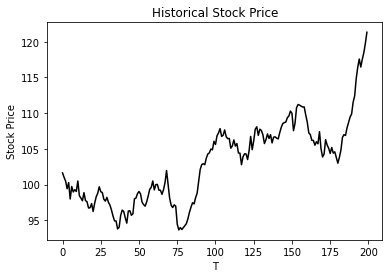

In [5]:
import matplotlib.pyplot as plt
df.plot(kind="line",color="k")
plt.xlabel("T")
plt.ylabel("Stock Price")
plt.title("Historical Stock Price")
plt.show()

Going back to the prior lecture, we learned about rolling windows. Let's once again use this.

In [6]:
#Let's get a rolling mean dataframe
rolling_mean = df.rolling(window=22).mean()
print(rolling_mean)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
195    108.392252
196    108.959444
197    109.601481
198    110.265314
199    111.035135
Length: 200, dtype: float64


Now overlay the rolling mean on the true prices.

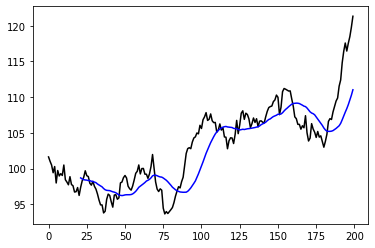

In [7]:
#Plot our rolling mean over our real data
df.plot(kind="line",color="k")
rolling_mean.plot(kind="line",color="b")
plt.show()

We can also get a rolling standard deviation of the stock price.

In [8]:
#We can also get the standard deviation for each rolling window
std = df.rolling(window=22).std()
print(std)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
195    4.604318
196    4.934126
197    5.217633
198    5.548086
199    5.861845
Length: 200, dtype: float64


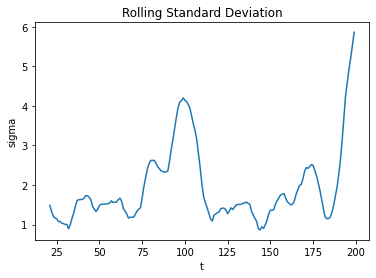

In [9]:
std.plot(kind="line")
plt.xlabel("t")
plt.ylabel("sigma")
plt.title("Rolling Standard Deviation")
plt.show()

## Bollinger Bands

The idea of bollinger bands is that we may see reversion to a rolling mean over time. Essentially, what one does is takes the rolling mean as well as two standard deviations above and below and you see at what times there is a breakout from these bands. Some people believe that if there is a breakout it will reverse, but others do not believe this is a viable trading strategy. This dataset is purposely created in a way for this to work, but in the real world you will have to determine for yourself what you think is correct or not.

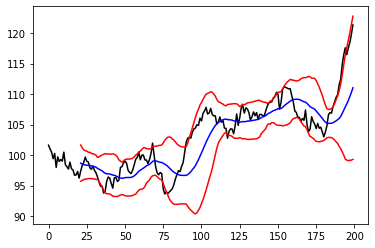

In [10]:
#Let's create bollinger bands by adding two standard deviations above and below

#Create the lower and upper bands
upper_band = rolling_mean + std*2
lower_band = rolling_mean - std*2

#Plot the bands
df.plot(kind="line",color="k")
rolling_mean.plot(kind="line",color="b")
upper_band.plot(kind="line",color="r")
lower_band.plot(kind="line",color="r")
plt.show()

To identify what points are below or above the bollinger bands, we can use our boolean indexing. Let's create two indices, one for above the upper band and one for below the lower band.

In [11]:
#Index for above the upper bound
i1 = df > upper_band

#Index for above the lower bound
i2 = df < lower_band

print(i1[:5])
print()
print(i2[:5])

0    False
1    False
2    False
3    False
4    False
dtype: bool

0    False
1    False
2    False
3    False
4    False
dtype: bool


We may also want to combine the two to make an index that tells us whether the price is either above or below the bands. First, we can see one example of where the price is above the band below (we also see no points are below the bands):

In [12]:
print(i1[55:65])
print()
print(i2[55:65])

55    False
56    False
57    False
58    False
59     True
60    False
61    False
62    False
63    False
64    False
dtype: bool

55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
dtype: bool


To combine them as an or statement, we can use the | (pipe) operator which will go index by index comparing if either is true.

In [13]:
#Create an index for either i1 or i2 being true
i3 = i1 | i2
print(i3[55:65])

55    False
56    False
57    False
58    False
59     True
60    False
61    False
62    False
63    False
64    False
dtype: bool


The reason you need to use the pipe operator is because pandas uses C libraries under the hood. The shorthand way to achieve this without setting variables would be the following (notice you need parantheses around the two conditions):

In [14]:
#Achieves the same goal:
print( (df > upper_band) | (df < lower_band) )

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


We are able to use this to index into the actual data.

In [15]:
print(df[(df > upper_band) | (df < lower_band)])

33      95.581040
34      94.909794
36      93.779819
59     100.498860
68     101.962135
75      94.446699
76      93.640495
77      93.968470
90     102.108535
91     102.793692
92     102.918407
117    102.772938
147    109.376186
148    109.608680
149    110.291232
186    107.934320
187    108.675057
188    109.455722
189    109.882610
190    111.542948
191    112.412441
192    114.817100
193    116.428156
194    117.587206
dtype: float64


The other operator that one can use is &, which will be the same as and in this case. So if we wanted to find all points outside the bounds, we could check the two conditions below:

In [16]:
#Check points within the bounds
print(df[(df < upper_band) & (df > lower_band)])

21      97.376812
22      98.278403
23      98.780897
24      99.681753
25      98.998025
          ...    
195    116.459768
196    117.562087
197    118.482369
198    119.793321
199    121.337763
Length: 155, dtype: float64


You will notice that the first 21 points are not in here? Why is that? If you look into the bands it will become obvious.

In [17]:
print(upper_band.head(21))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
dtype: float64


Because the windows are rolling over 22 days, the first 21 points are null. If we are testing to find the truth in both of these cases the null values will always return false because they are not valid numbers. One work around to this is that we can take an index and reverse the values with ~. So for example, let's grab an index for outside the bands and then reverse it.

In [18]:
#Get an index and then the opposite of the index
i1 = (df > upper_band) | (df < lower_band)
print(i1[:5])
print()
i2 = ~i1
print(i2[:5])

0    False
1    False
2    False
3    False
4    False
dtype: bool

0    True
1    True
2    True
3    True
4    True
dtype: bool


A useful application of this is to find the percent of the time that the price is outside the bounds.

In [19]:
#What percent is outside of the bands?
print(len(df[i1]) / len(df))

0.12
